In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [49]:
gender_df = pd.read_csv("../data/assignment_gender.csv")
gender_df.head()

,Gender,Height,Weight,iq,Age
0,Male,193,62,105,27
1,Female,157,79,103,43
2,Male,194,56,109,27
3,Female,208,102,112,28
4,Male,181,106,94,56


In [50]:
def gender2number(name):
    if name == "Male":
        return 1
    return 0

In [51]:
gender_num = map(gender2number, gender_df["Gender"])
gender_df["GenderNum"] = list(gender_num)
gender_df.head()

,Gender,Height,Weight,iq,Age,GenderNum
0,Male,193,62,105,27,1
1,Female,157,79,103,43,0
2,Male,194,56,109,27,1
3,Female,208,102,112,28,0
4,Male,181,106,94,56,1


In [52]:
length = len(gender_df)
random = np.random.randint(0,1,size = length)
print(length)

100


In [53]:
count = 0

for i in range(length):
    if random[i] == gender_df["GenderNum"][i]:
        count += 1

accuracy = count/length
print("accuracy :", accuracy*100, "%")  

accuracy : 50.0 %


In [54]:
feature_combis=[]
import itertools
features = ["Height","Weight","iq","Age"]
for n in range(1,5):
    for selected_features in itertools.combinations(features, n):
            feature_combis.append(list(selected_features))

feature_combis


[['Height'],
 ['Weight'],
 ['iq'],
 ['Age'],
 ['Height', 'Weight'],
 ['Height', 'iq'],
 ['Height', 'Age'],
 ['Weight', 'iq'],
 ['Weight', 'Age'],
 ['iq', 'Age'],
 ['Height', 'Weight', 'iq'],
 ['Height', 'Weight', 'Age'],
 ['Height', 'iq', 'Age'],
 ['Weight', 'iq', 'Age'],
 ['Height', 'Weight', 'iq', 'Age']]

------------ Random Baseline --------------
FEATURE------- ['Height'] --------
Correctly predicted = 9.787879
Accuracy 0.489394
FEATURE------- ['Weight'] --------
Correctly predicted = 9.848485
Accuracy 0.492424
FEATURE------- ['iq'] --------
Correctly predicted = 9.727273
Accuracy 0.486364
FEATURE------- ['Age'] --------
Correctly predicted = 9.808081
Accuracy 0.490404
FEATURE------- ['Height', 'Weight'] --------
Correctly predicted = 10.050505
Accuracy 0.502525
FEATURE------- ['Height', 'iq'] --------
Correctly predicted = 10.070707
Accuracy 0.503535
FEATURE------- ['Height', 'Age'] --------
Correctly predicted = 10.030303
Accuracy 0.501515
FEATURE------- ['Weight', 'iq'] --------
Correctly predicted = 10.050505
Accuracy 0.502525
FEATURE------- ['Weight', 'Age'] --------
Correctly predicted = 10.363636
Accuracy 0.518182
FEATURE------- ['iq', 'Age'] --------
Correctly predicted = 9.929293
Accuracy 0.496465
FEATURE------- ['Height', 'Weight', 'iq'] --------
Correctly predicted = 9.9898

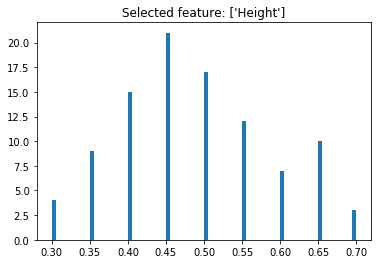

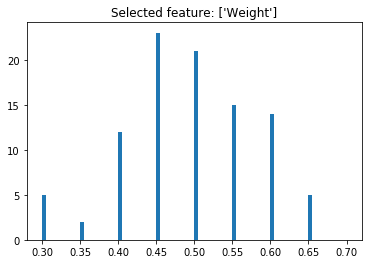

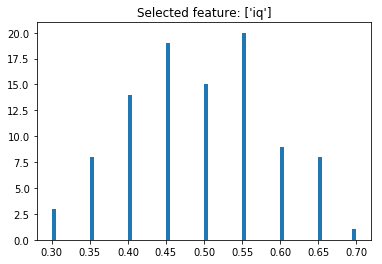

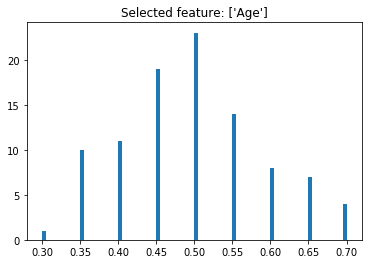

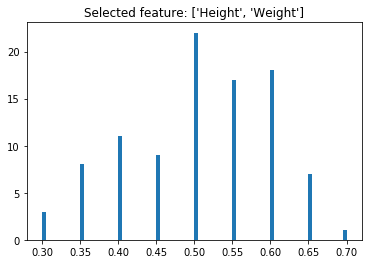

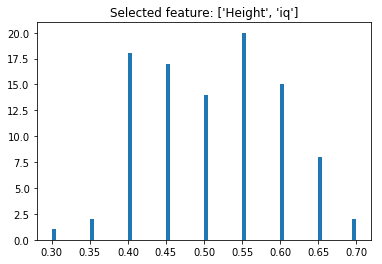

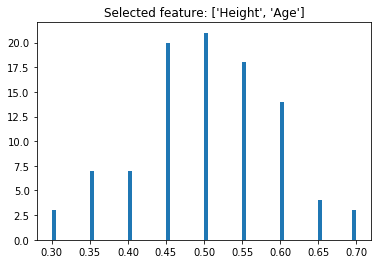

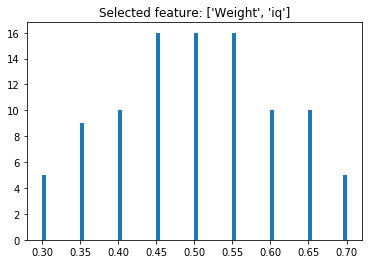

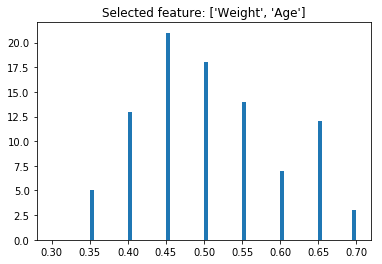

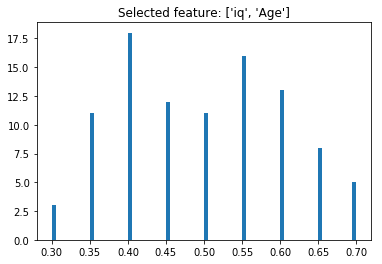

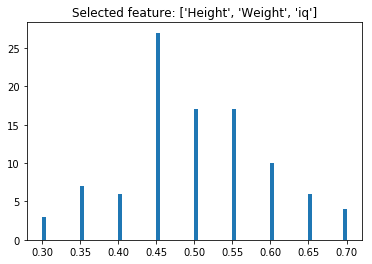

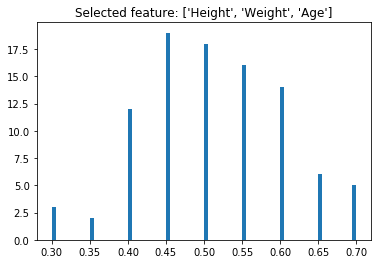

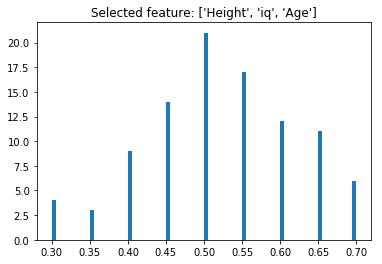

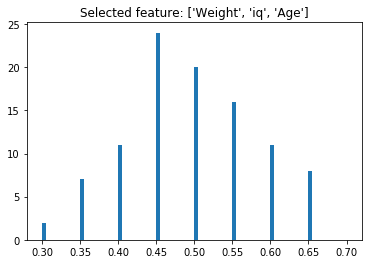

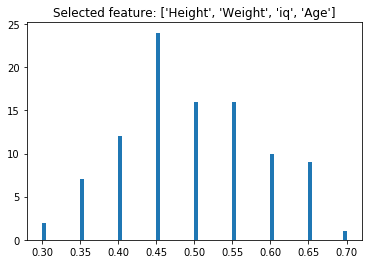

In [55]:
print("------------ Random Baseline --------------")
for feature in feature_combis:
    pred = []
    acc = []
    
    X = gender_df[feature] 
    y = gender_df["GenderNum"]
    
    for i in np.arange(1,100): 
        # data splitting 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        # random baseline 
        s = y_test.shape 
        baseline_rand = np.random.randint(0,1,size = s[0])
        # evaluation 
        pred.append((baseline_rand == y_test).sum()) 
        acc.append(accuracy_score(y_test, baseline_rand))
    
    print("FEATURE-------",feature,"--------")
    print("Correctly predicted = %f" % np.mean(pred)) 
    print("Accuracy %f" % np.mean(acc))
    
    plt.title("Selected feature: " + str(feature))
    plt.hist(acc, range=(0.3, 0.7), bins=80)
    plt.show()

In [60]:
print("-------------All Male --------------")
for feature in feature_combis:      
    pred = []
    acc = []
    X = gender_df[feature]
    y = gender_df["GenderNum"]
    for i in np.arange(1,100):
        # data splitting
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        # random baseline
        s = y_test.shape
        baseline_rand = np.ones(s[0])
        # evaluation
        pred.append((baseline_rand == y_test).sum())
        acc.append(accuracy_score(y_test, baseline_rand))
        
    print("FEATURE-------",feature,"--------")
    print("Correctly predicted = %f" % np.mean(pred))
    print("Accuracy %f" % np.mean(acc))

-------------All Male --------------
FEATURE------- ['Height'] --------
Correctly predicted = 9.838384
Accuracy 0.491919
FEATURE------- ['Weight'] --------
Correctly predicted = 9.888889
Accuracy 0.494444
FEATURE------- ['iq'] --------
Correctly predicted = 9.616162
Accuracy 0.480808
FEATURE------- ['Age'] --------
Correctly predicted = 10.363636
Accuracy 0.518182
FEATURE------- ['Height', 'Weight'] --------
Correctly predicted = 9.707071
Accuracy 0.485354
FEATURE------- ['Height', 'iq'] --------
Correctly predicted = 9.898990
Accuracy 0.494949
FEATURE------- ['Height', 'Age'] --------
Correctly predicted = 9.474747
Accuracy 0.473737
FEATURE------- ['Weight', 'iq'] --------
Correctly predicted = 10.020202
Accuracy 0.501010
FEATURE------- ['Weight', 'Age'] --------
Correctly predicted = 9.717172
Accuracy 0.485859
FEATURE------- ['iq', 'Age'] --------
Correctly predicted = 10.161616
Accuracy 0.508081
FEATURE------- ['Height', 'Weight', 'iq'] --------
Correctly predicted = 9.767677
Accura

In [57]:
print("Female ",np.sum(gender_df["GenderNum"] == 0))
print("Male ",np.sum(gender_df["GenderNum"] == 1))

Female  50
Male  50


In [58]:
print("---------- Majority Baseline -------------")
for feature in feature_combis:
    pred = []
    acc = []
    X = gender_df[feature]
    y = gender_df["GenderNum"]
    
    for i in np.arange(1,100):
        # data splitting
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        # majority baseline
        s = y_test.shape
        baseline_rand = np.ones(s[0])
        # evaluation
        pred.append((baseline_rand == y_test).sum())
        acc.append(accuracy_score(y_test, baseline_rand))
        
    print("FEATURE-------",feature,"--------")    
    print("Correctly predicted = %f" % np.mean(pred))
    print("Accuracy %f" % np.mean(acc))


---------- Majority Baseline -------------
FEATURE------- ['Height'] --------
Correctly predicted = 10.080808
Accuracy 0.504040
FEATURE------- ['Weight'] --------
Correctly predicted = 10.060606
Accuracy 0.503030
FEATURE------- ['iq'] --------
Correctly predicted = 9.848485
Accuracy 0.492424
FEATURE------- ['Age'] --------
Correctly predicted = 10.101010
Accuracy 0.505051
FEATURE------- ['Height', 'Weight'] --------
Correctly predicted = 10.060606
Accuracy 0.503030
FEATURE------- ['Height', 'iq'] --------
Correctly predicted = 9.939394
Accuracy 0.496970
FEATURE------- ['Height', 'Age'] --------
Correctly predicted = 9.959596
Accuracy 0.497980
FEATURE------- ['Weight', 'iq'] --------
Correctly predicted = 10.252525
Accuracy 0.512626
FEATURE------- ['Weight', 'Age'] --------
Correctly predicted = 10.060606
Accuracy 0.503030
FEATURE------- ['iq', 'Age'] --------
Correctly predicted = 9.616162
Accuracy 0.480808
FEATURE------- ['Height', 'Weight', 'iq'] --------
Correctly predicted = 10.131

In [59]:

print("---------Logistic Regression------------")

from sklearn.linear_model import LogisticRegression
for feature in feature_combis:
    pred = []
    acc = []
    
    X = gender_df[feature]
    y = gender_df["GenderNum"]
    for i in np.arange(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        # Logistic Reression
        lr = LogisticRegression(solver= "lbfgs")
        lr.fit(X_train, y_train.values.ravel())
        y_pred = lr.predict(X_test)
        pred.append((y_test.values == y_pred).sum())
        acc.append(accuracy_score(y_test, y_pred))
        
    print("FEATURE-------",feature,"--------") 
    print("Correctly predicted = %f" % np.mean(pred))
    print("Accuracy %f" % np.mean(acc))

---------Logistic Regression------------
FEATURE------- ['Height'] --------
Correctly predicted = 7.686869
Accuracy 0.384343
FEATURE------- ['Weight'] --------
Correctly predicted = 8.000000
Accuracy 0.400000
FEATURE------- ['iq'] --------
Correctly predicted = 11.575758
Accuracy 0.578788
FEATURE------- ['Age'] --------
Correctly predicted = 8.666667
Accuracy 0.433333
FEATURE------- ['Height', 'Weight'] --------
Correctly predicted = 7.484848
Accuracy 0.374242
FEATURE------- ['Height', 'iq'] --------
Correctly predicted = 11.585859
Accuracy 0.579293
FEATURE------- ['Height', 'Age'] --------
Correctly predicted = 8.212121
Accuracy 0.410606
FEATURE------- ['Weight', 'iq'] --------
Correctly predicted = 11.858586
Accuracy 0.592929
FEATURE------- ['Weight', 'Age'] --------
Correctly predicted = 7.989899
Accuracy 0.399495
FEATURE------- ['iq', 'Age'] --------
Correctly predicted = 12.050505
Accuracy 0.602525
FEATURE------- ['Height', 'Weight', 'iq'] --------
Correctly predicted = 11.363636
